In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_excel('/content/pesquisa.xlsx')

In [ ]:
df.head()  # Exibe as primeiras linhas do DataFrame

,TURMA,DISCIPLINA,PERÍODO,SEXO,PESQ1,PESQ2
0,T126,ALG-I,1P,1,0,NaN
1,T126,ALG-I,1P,1,0,NaN
2,T126,ALG-I,1P,1,P,P
3,T126,ALG-I,1P,1,0,NaN
4,T126,ALG-I,1P,1,H,H


In [ ]:
df.info()  # Exibe informações sobre as colunas e os tipos de dados


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   TURMA       457 non-null    object
 1   DISCIPLINA  457 non-null    object
 2   PERÍODO     457 non-null    object
 3   SEXO        457 non-null    int64 
 4   PESQ1       457 non-null    object
 5   PESQ2       284 non-null    object
dtypes: int64(1), object(5)
memory usage: 21.5+ KB


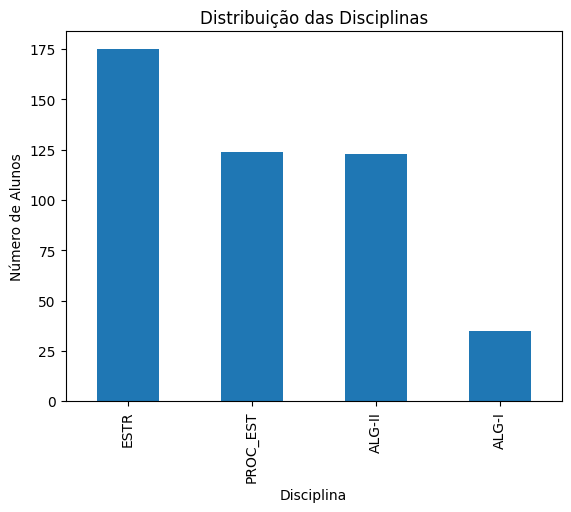

In [ ]:
df['DISCIPLINA'].value_counts().plot(kind='bar')
plt.title('Distribuição das Disciplinas')
plt.xlabel('Disciplina')
plt.ylabel('Número de Alunos')
plt.show()

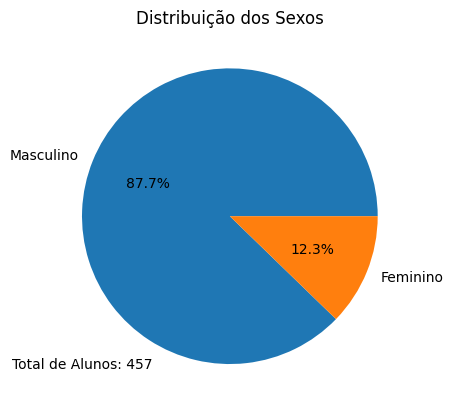

In [ ]:
# Substituir os valores numéricos de SEXO pelas descrições correspondentes
sexo_counts = df['SEXO'].replace({1: 'Masculino', 2: 'Feminino'}).value_counts()

# Plotar o gráfico de pizza
ax = sexo_counts.plot(kind='pie', autopct='%1.1f%%')

# Adicionar o total de alunos como texto no centro do gráfico
total_alunos = len(df)
plt.text(-1, -1, f'Total de Alunos: {total_alunos}', ha='center', va='center')

plt.title('Distribuição dos Sexos')
plt.ylabel('')

plt.show()

In [ ]:
print(df['TURMA'].dtypes)

object


In [ ]:
print(df['TURMA'].unique())

['T126' 'T927' 'T123' 'T132' 'T145' 'T146' 'T147' 'T161' 'T962' 'T163']


In [ ]:
df['DIA_DA_SEMANA'] = df['TURMA'].str[2]  # Extrai o dia da semana da coluna 'TURMA'
df['TURNO'] = df['TURMA'].str[3]  # Extrai o turno da coluna 'TURMA'

In [ ]:
print(df['DIA_DA_SEMANA'].unique())
print(df['TURNO'].unique())


['2' '3' '4' '6']
['6' '7' '3' '2' '5' '1']


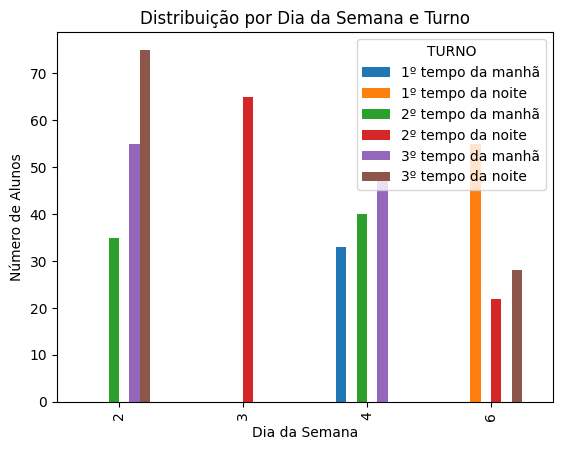

In [ ]:
# Mapear o código de turno para a descrição correspondente
turno_map = {
    '1': '1º tempo da noite',
    '2': '2º tempo da noite',
    '3': '3º tempo da noite',
    '5': '1º tempo da manhã',
    '6': '2º tempo da manhã',
    '7': '3º tempo da manhã'
}

df['TURNO'] = df['TURNO'].map(turno_map)

# Mapear o código de dia da semana para o valor numérico correspondente
dia_da_semana_map = {
    '2': 2,  # Segunda-feira
    '3': 3,  # Terça-feira
    '4': 4,  # Quarta-feira
    '5': 5,  # Quinta-feira
    '6': 6   # Sexta-feira
}

df['DIA_DA_SEMANA'] = df['DIA_DA_SEMANA'].map(dia_da_semana_map)

df.groupby(['DIA_DA_SEMANA', 'TURNO']).size().unstack().plot(kind='bar')
plt.title('Distribuição por Dia da Semana e Turno')
plt.xlabel('Dia da Semana')
plt.ylabel('Número de Alunos')
plt.show()



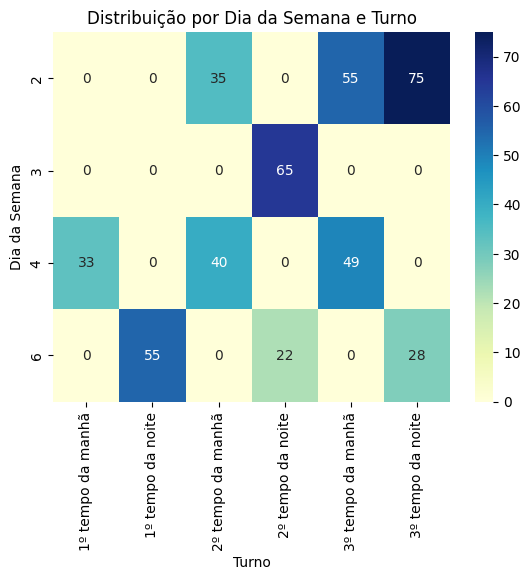

In [ ]:
# Criação de uma tabela de frequência com a distribuição por dia da semana e turno
frequencia = df.groupby(['DIA_DA_SEMANA', 'TURNO']).size().unstack().fillna(0).astype(int)

# Plotagem do gráfico de heatmap
sns.heatmap(frequencia, cmap='YlGnBu', annot=True, fmt='d')

plt.title('Distribuição por Dia da Semana e Turno')
plt.xlabel('Turno')
plt.ylabel('Dia da Semana')

plt.show()

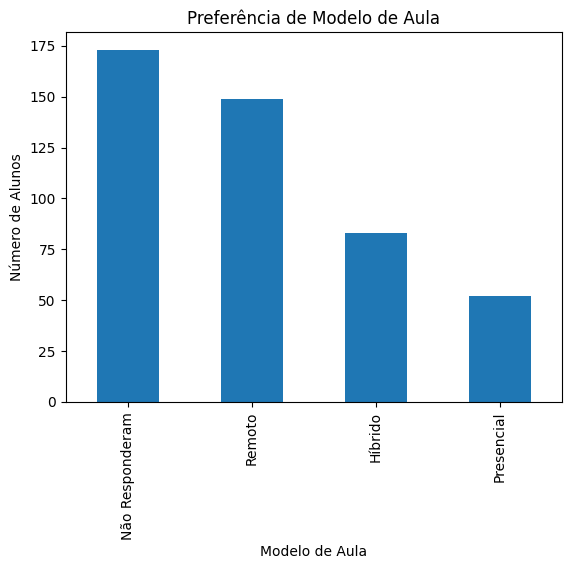

In [ ]:
# Substituir os valores nulos de PESQ2 pelos valores 0 de PESQ1
df['PESQ2'].fillna(0, inplace=True)

# Mapear os valores para as descrições correspondentes
map_valores = {
    '00': 'Não Responderam',
    'RR': 'Remoto',
    'HH': 'Híbrido',
    'PP': 'Presencial'
}

# Concatenar as colunas PESQ1 e PESQ2 em uma única coluna
merged_col = df['PESQ1'].fillna(0).astype(str) + df['PESQ2'].astype(str)

# Mapear os valores da coluna unificada para as descrições correspondentes
merged_col = merged_col.map(map_valores)

# Contagem dos valores e plotagem do gráfico
counts = merged_col.value_counts()

ax = counts.plot(kind='bar')
plt.title('Preferência de Modelo de Aula')
plt.xlabel('Modelo de Aula')
plt.ylabel('Número de Alunos')

plt.show()


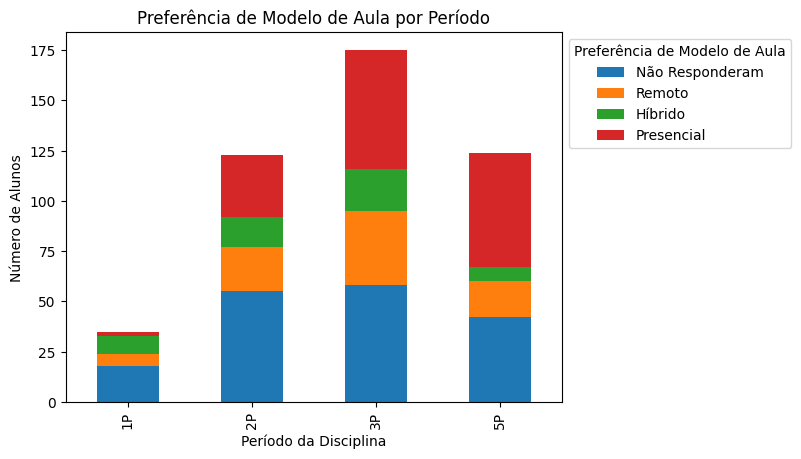

In [ ]:
# Concatenação das colunas PESQ1 e PESQ2
df['PREFERENCIA'] = df['PESQ1'].fillna(0).astype(str) + df['PESQ2'].astype(str)

# Criação da tabela de contingência
contingencia = pd.crosstab(df['PERÍODO'], df['PREFERENCIA'])

# Plotagem do gráfico de barras empilhadas
ax = contingencia.plot(kind='bar', stacked=True)

# Definição das etiquetas personalizadas
etiquetas = ['Não Responderam', 'Remoto', 'Híbrido', 'Presencial']

# Adição das etiquetas personalizadas à legenda
ax.legend(etiquetas, title='Preferência de Modelo de Aula', bbox_to_anchor=(1, 1), loc='upper left')

plt.title('Preferência de Modelo de Aula por Período')
plt.xlabel('Período da Disciplina')
plt.ylabel('Número de Alunos')

plt.show()